<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Neural_Network_classification_pytorch(Non_Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Recreating non-linear data:

In [96]:
#Introduction to Non-linearity of our model:
import sklearn
from sklearn.datasets import make_circles #X is basically input features...and Y is the output label...
n_sample=1000
X,Y=make_circles(n_sample,
                noise=0.03,
                random_state=42)
print("First five sample of X:\n",X[:5])
print("First five sample of Y:",Y[:5])

First five sample of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five sample of Y: [1 1 1 1 0]


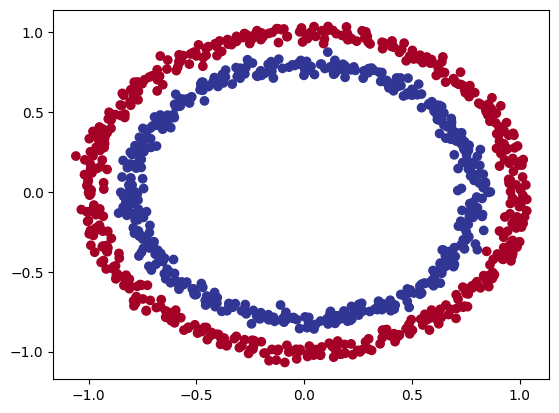

In [97]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y,
            cmap=plt.cm.RdYlBu)


In [98]:
#1.1:We have to convert a data into tensors first:
import torch
X=torch.from_numpy(X).type(torch.float32)
Y=torch.from_numpy(Y).type(torch.float32)
type(X),type(Y),X.shape,Y.shape
print(X.dtype,Y.dtype)

torch.float32 torch.float32


In [99]:
#1.2splitting our data for training and testing:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(800, 200, 800, 200)

###Our Data is ready now we will our on our model:

In [100]:
##Non-linearity:
#What pattern we can find out of infinite number of straight or non-straight lines, we say from linear and non linear functions:

###Building Neural network with Non-Linearity:

In [101]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [102]:
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)

In [103]:
from torch import nn
class Non_Linear_function(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer_1=nn.Linear(in_features=2,out_features=10)
    self.Layer_2=nn.Linear(in_features=10,out_features=10)
    self.Layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU() ##max(0,x)

  def forward(self,x):
    return self.Layer_3(self.relu(self.Layer_2(self.relu(self.Layer_1(x)))))

model_nonl=Non_Linear_function().to(device)
model_nonl


Non_Linear_function(
  (Layer_1): Linear(in_features=2, out_features=10, bias=True)
  (Layer_2): Linear(in_features=10, out_features=10, bias=True)
  (Layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [104]:
#Accuracy is how many predictions your model got correct, out of all the predictions it made.
def Accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100

  return acc


In [105]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_nonl.parameters(),
                          lr=0.155)


In [106]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1100
for epoch in range(epochs):
  model_nonl.train()
  y_logits=model_nonl(X_train).squeeze()
  train_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,Y_train)
  accuracy=Accuracy_fn(y_true=Y_train,
               y_pred=train_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_nonl.eval()
  with torch.inference_mode():
    test_logits=model_nonl(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,Y_test)
    test_acc=Accuracy_fn(y_true=Y_test,
                         y_pred=test_pred)

  if epoch%100== 0:
    print(f"Epoch: {epoch},Training Loss: {loss:.5f},Training Accuracy:{accuracy:.2f}%,Testing Loss: {test_loss:.5f},Test Accuracy: {test_acc:.2f}%")


Epoch: 0,Training Loss: 0.69295,Training Accuracy:50.00%,Testing Loss: 0.69315,Test Accuracy: 50.00%
Epoch: 100,Training Loss: 0.69043,Training Accuracy:53.12%,Testing Loss: 0.69018,Test Accuracy: 55.00%
Epoch: 200,Training Loss: 0.68773,Training Accuracy:53.00%,Testing Loss: 0.68697,Test Accuracy: 56.50%
Epoch: 300,Training Loss: 0.68264,Training Accuracy:52.62%,Testing Loss: 0.68124,Test Accuracy: 56.00%
Epoch: 400,Training Loss: 0.67373,Training Accuracy:54.87%,Testing Loss: 0.67122,Test Accuracy: 57.00%
Epoch: 500,Training Loss: 0.65625,Training Accuracy:62.62%,Testing Loss: 0.65218,Test Accuracy: 65.50%
Epoch: 600,Training Loss: 0.61090,Training Accuracy:78.38%,Testing Loss: 0.61033,Test Accuracy: 81.00%
Epoch: 700,Training Loss: 0.49719,Training Accuracy:93.25%,Testing Loss: 0.51201,Test Accuracy: 89.50%
Epoch: 800,Training Loss: 0.32381,Training Accuracy:98.38%,Testing Loss: 0.36636,Test Accuracy: 93.50%
Epoch: 900,Training Loss: 0.17564,Training Accuracy:99.50%,Testing Loss: 0.

In [107]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


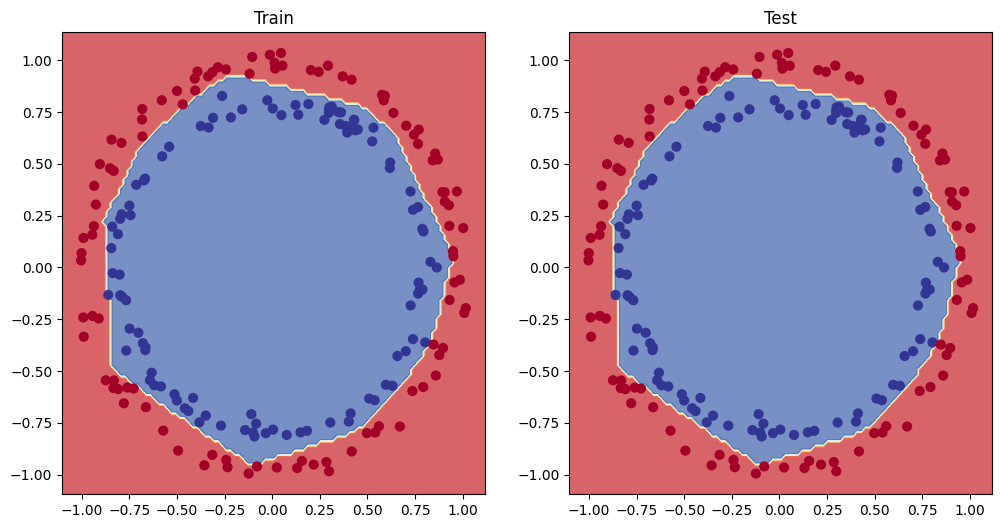

In [108]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_nonl,X_test,Y_test)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_nonl,X_test,Y_test)
